In [311]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [312]:
folder = Path('C:/Upgrad Projects/ML2-M4-ComparingModels')

# Importing all datasets
econsumers = pd.read_csv(folder/"ecommerce_consumers.csv")


In [313]:
econsumers.head()

,ratio,time,label
0,0.54,17.2,female
1,0.93,18.2,male
2,0.84,13.6,female
3,0.19,6.0,male
4,0.89,13.2,female


In [314]:
econsumers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
ratio    200 non-null float64
time     200 non-null float64
label    200 non-null object
dtypes: float64(2), object(1)
memory usage: 4.8+ KB


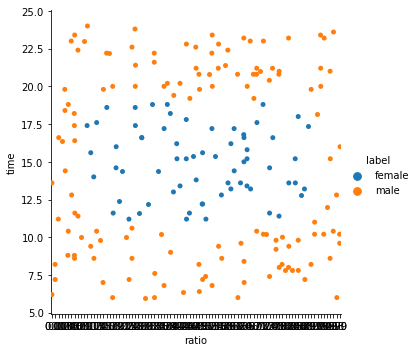

In [315]:
sns.catplot(x='ratio', y='time',hue="label", data=econsumers)

In [316]:
# Normalising continuous features
df = econsumers[['ratio','time']]

In [317]:
normalized_df=(df-df.mean())/df.std()

In [318]:
econsumers_norm = econsumers.drop(['ratio','time'], 1)

In [319]:
econsumers_norm = pd.concat([econsumers_norm, normalized_df], axis=1)

In [320]:
econsumers_norm.head()

,label,ratio,time
0,female,0.131897,0.446821
1,male,1.447495,0.635036
2,female,1.143895,-0.230751
3,male,-1.048767,-1.661182
4,female,1.312562,-0.306037


In [321]:
econsumers_norm['label'] = econsumers_norm['label'].map({'female': 1, 'male': 0})

In [322]:
econsumers_norm.head()

,label,ratio,time
0,1,0.131897,0.446821
1,0,1.447495,0.635036
2,1,1.143895,-0.230751
3,0,-1.048767,-1.661182
4,1,1.312562,-0.306037


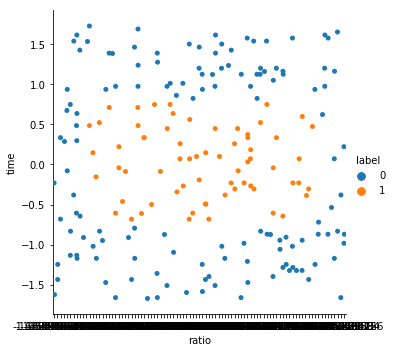

In [323]:
sns.catplot(x='ratio', y='time',hue="label", data=econsumers_norm)

In [324]:
from sklearn.model_selection import train_test_split

In [325]:
# Putting feature variable to X
X = econsumers_norm.drop(['label'],axis=1)

# Putting response variable to y
y = econsumers_norm['label']

In [326]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: label, dtype: int64

In [327]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [328]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [329]:
logsk = LogisticRegression()
logsk.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [330]:
from sklearn.model_selection import cross_val_score
result = cross_val_score(logsk, X_test, y_test, scoring='accuracy')

In [331]:
result

array([ 0.7,  0.7,  0.7])

In [332]:
# Predicted probabilities
y_pred_lr = logsk.predict_proba(X_test)

In [333]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred_lr)

In [334]:
y_pred_df.head()

,0,1
0,0.660193,0.339807
1,0.672462,0.327538
2,0.647905,0.352095
3,0.663781,0.336219
4,0.660241,0.339759


In [335]:
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

In [336]:
# Let's see the head
y_pred_1.head()

,1
0,0.339807
1,0.327538
2,0.352095
3,0.336219
4,0.339759


In [337]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [338]:
y_test_df.head()

,label
126,0
104,0
99,0
92,1
111,0


In [339]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [340]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)

In [341]:
# Let's see the head of y_pred_final
y_pred_final.head()

,label,1
0,0,0.339807
1,0,0.327538
2,0,0.352095
3,1,0.336219
4,0,0.339759


In [342]:
# Rearranging the columns
y_pred_final.columns = ['label_orig','gender_prob']

In [343]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.gender_prob.map( lambda x: 1 if x > 0.5 else 0)

In [344]:
# Let's see the head
y_pred_final.head()

,label_orig,gender_prob,predicted
0,0,0.339807,0
1,0,0.327538,0
2,0,0.352095,0
3,1,0.336219,0
4,0,0.339759,0


In [345]:
from sklearn import metrics

In [346]:
#Let's check the overall accuracy.
metrics.accuracy_score( y_pred_final.label_orig, y_pred_final.predicted)

0.69999999999999996

#### Decision Tree

In [347]:
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=10)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [348]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_tree = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_tree))

             precision    recall  f1-score   support

          0       1.00      0.95      0.98        42
          1       0.90      1.00      0.95        18

avg / total       0.97      0.97      0.97        60



In [349]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_tree))
print(accuracy_score(y_test,y_pred_tree))

[[40  2]
 [ 0 18]]
0.966666666667


### SVM Model

In [350]:
# using rbf kernel, C=1, default value of gamma
from sklearn.svm import SVC
model = SVC(C = 1, kernel='rbf')
model.fit(X_train, y_train)
y_pred_svm = model.predict(X_test)

In [351]:
# confusion matrix
confusion_matrix(y_true=y_test, y_pred=y_pred_svm)

array([[42,  0],
       [ 4, 14]], dtype=int64)

In [352]:
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred_svm))

# precision
print("precision", metrics.precision_score(y_test, y_pred_svm))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred_svm))

accuracy 0.933333333333
precision 1.0
recall 0.777777777778
